# Dense Neural Network on Binary Classification with Hyperparameter Tuning

Galen Wilkerson

In [323]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [324]:
df = pd.read_csv('./Train.csv')

## Understand data

In [325]:
df.shape

(147072, 11)

In [326]:
df.describe()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,12.107321,0.013599,0.433970,500.308938,0.167428,0.079292,0.277340,0.010735,0.251830,0.740360,0.066510
std,528.035137,0.671062,4.324017,2181.510949,1.843019,0.860352,4.301489,0.571463,4.287297,1.108458,0.249173
min,-0.291358,-2.363636,0.000000,-0.528734,-0.744872,-1.333333,0.000000,-0.500000,0.000000,0.000000,0.000000
25%,-0.234323,-0.500000,0.000000,-0.275459,-0.471368,-0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000
50%,0.001486,0.000000,0.000000,0.000119,0.004530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759917,0.500000,0.000000,0.721373,0.520085,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000
max,95823.652220,2.590909,98.000000,318121.775400,305.932051,8.333333,98.000000,26.500000,98.000000,20.000000,1.000000


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147072 entries, 0 to 147071
Data columns (total 11 columns):
variable_0    100000 non-null float64
variable_1    100000 non-null float64
variable_2    100000 non-null float64
variable_3    100000 non-null float64
variable_4    100000 non-null float64
variable_5    100000 non-null float64
variable_6    100000 non-null float64
variable_7    100000 non-null float64
variable_8    100000 non-null float64
variable_9    100000 non-null float64
class_col     100000 non-null float64
dtypes: float64(11)
memory usage: 12.3 MB


In [328]:
df.class_col.unique()

array([  0.,   1.,  nan])

### Take a look at the data distribution, including balance of classes

<IPython.core.display.Javascript object>


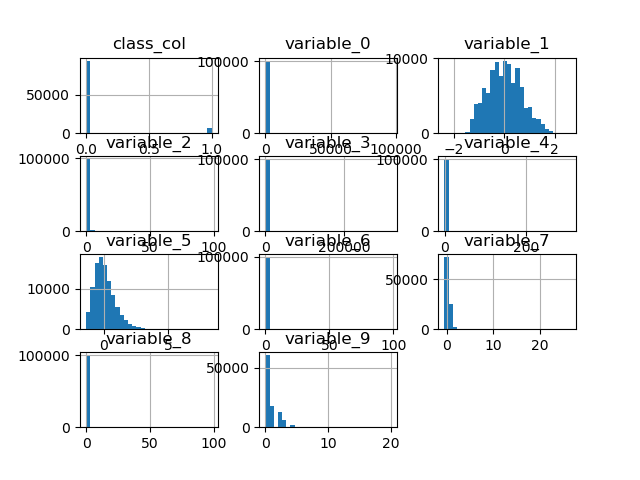

In [336]:
df.hist(bins=30);

In [330]:
df

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
0,1.616623,-0.909091,3.0,-0.041629,0.284188,0.166667,0.0,0.0,1.0,2.0,0.0
1,-0.029310,1.500000,0.0,0.551353,-0.515812,0.166667,0.0,-0.5,0.0,0.0,0.0
2,1.598362,0.227273,0.0,-0.280171,-0.385897,-1.166667,0.0,-0.5,0.0,0.0,0.0
3,0.355677,0.954545,0.0,-0.101158,0.158718,-0.333333,0.0,0.0,0.0,0.0,0.0
4,-0.291358,0.590909,0.0,-0.299727,0.696838,0.000000,0.0,0.5,0.0,0.0,0.0
5,-0.014016,0.000000,0.0,1.195264,0.537179,1.333333,0.0,1.0,0.0,1.0,0.0
6,-0.130741,0.227273,0.0,-0.518843,0.451709,-0.833333,0.0,-0.5,0.0,0.0,0.0
7,0.427274,0.045455,0.0,0.046668,0.810684,1.333333,0.0,0.5,0.0,2.0,0.0
8,-0.257348,0.545455,0.0,3874.367005,-0.744872,-0.166667,0.0,0.0,0.0,0.0,0.0
9,-0.257157,1.318182,0.0,-0.390526,0.896496,-0.166667,0.0,-0.5,0.0,0.0,0.0


## Are there NaN values, and where?

In [331]:
df.isna().sum()

variable_0    47072
variable_1    47072
variable_2    47072
variable_3    47072
variable_4    47072
variable_5    47072
variable_6    47072
variable_7    47072
variable_8    47072
variable_9    47072
class_col     47072
dtype: int64

In [332]:
vals = df.isna().values.astype(int)
vals

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [333]:
df_vals = pd.DataFrame(vals)
df_vals

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [334]:
df_vals.shape

(147072, 11)

<IPython.core.display.Javascript object>


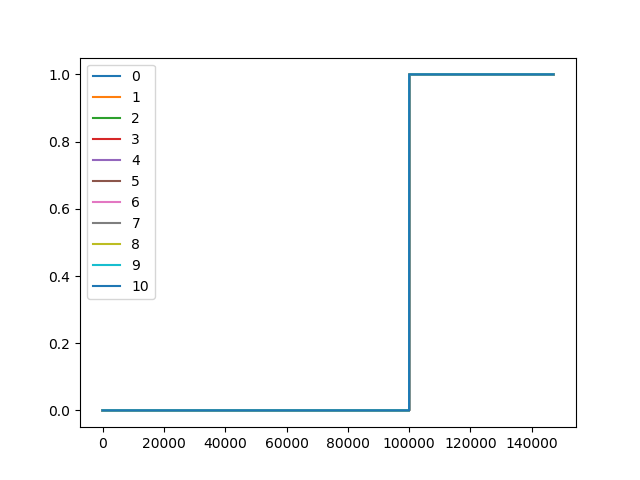

In [335]:
# Try to understand where the NaN values occur
df_vals.plot();

## Clean up NaN values

In [284]:
# since the NaN values occur in a block in the latter part of the data, we can just drop them
df.dropna(inplace=True)

In [285]:
df.shape

(100000, 11)

In [286]:
df

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
0,1.616623,-0.909091,3.0,-0.041629,0.284188,0.166667,0.0,0.0,1.0,2.0,0.0
1,-0.029310,1.500000,0.0,0.551353,-0.515812,0.166667,0.0,-0.5,0.0,0.0,0.0
2,1.598362,0.227273,0.0,-0.280171,-0.385897,-1.166667,0.0,-0.5,0.0,0.0,0.0
3,0.355677,0.954545,0.0,-0.101158,0.158718,-0.333333,0.0,0.0,0.0,0.0,0.0
4,-0.291358,0.590909,0.0,-0.299727,0.696838,0.000000,0.0,0.5,0.0,0.0,0.0
5,-0.014016,0.000000,0.0,1.195264,0.537179,1.333333,0.0,1.0,0.0,1.0,0.0
6,-0.130741,0.227273,0.0,-0.518843,0.451709,-0.833333,0.0,-0.5,0.0,0.0,0.0
7,0.427274,0.045455,0.0,0.046668,0.810684,1.333333,0.0,0.5,0.0,2.0,0.0
8,-0.257348,0.545455,0.0,3874.367005,-0.744872,-0.166667,0.0,0.0,0.0,0.0,0.0
9,-0.257157,1.318182,0.0,-0.390526,0.896496,-0.166667,0.0,-0.5,0.0,0.0,0.0


In [287]:
df.describe()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,class_col
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,12.107321,0.013599,0.433970,500.308938,0.167428,0.079292,0.277340,0.010735,0.251830,0.740360,0.066510
std,528.035137,0.671062,4.324017,2181.510949,1.843019,0.860352,4.301489,0.571463,4.287297,1.108458,0.249173
min,-0.291358,-2.363636,0.000000,-0.528734,-0.744872,-1.333333,0.000000,-0.500000,0.000000,0.000000,0.000000
25%,-0.234323,-0.500000,0.000000,-0.275459,-0.471368,-0.500000,0.000000,-0.500000,0.000000,0.000000,0.000000
50%,0.001486,0.000000,0.000000,0.000119,0.004530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759917,0.500000,0.000000,0.721373,0.520085,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000
max,95823.652220,2.590909,98.000000,318121.775400,305.932051,8.333333,98.000000,26.500000,98.000000,20.000000,1.000000


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
variable_0    100000 non-null float64
variable_1    100000 non-null float64
variable_2    100000 non-null float64
variable_3    100000 non-null float64
variable_4    100000 non-null float64
variable_5    100000 non-null float64
variable_6    100000 non-null float64
variable_7    100000 non-null float64
variable_8    100000 non-null float64
variable_9    100000 non-null float64
class_col     100000 non-null float64
dtypes: float64(11)
memory usage: 9.2 MB


In [289]:
df.isna().sum()

variable_0    0
variable_1    0
variable_2    0
variable_3    0
variable_4    0
variable_5    0
variable_6    0
variable_7    0
variable_8    0
variable_9    0
class_col     0
dtype: int64

<IPython.core.display.Javascript object>


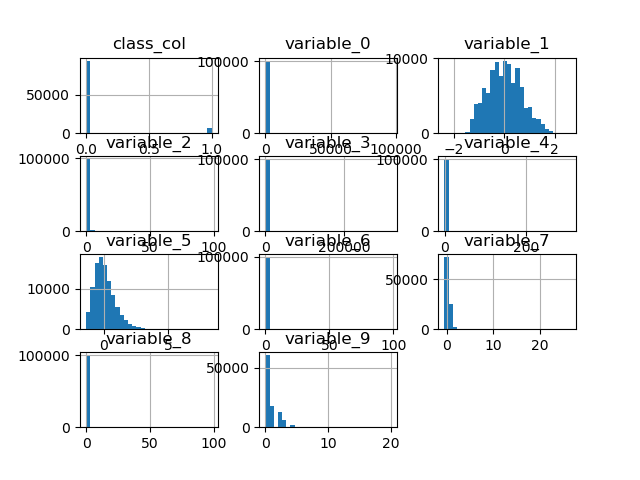

In [290]:
df.hist(bins = 30);

## Prepare data for machine learning (scale, center), pop y

In [307]:
y = df.pop('class_col').astype(int).values

In [308]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [341]:
# understand class imbalance
(y == 0).sum() / len(y)

0.93349000000000004

In [342]:
(y == 1).sum() / len(y)

0.06651

In [309]:
df

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9
0,1.616623,-0.909091,3.0,-0.041629,0.284188,0.166667,0.0,0.0,1.0,2.0
1,-0.029310,1.500000,0.0,0.551353,-0.515812,0.166667,0.0,-0.5,0.0,0.0
2,1.598362,0.227273,0.0,-0.280171,-0.385897,-1.166667,0.0,-0.5,0.0,0.0
3,0.355677,0.954545,0.0,-0.101158,0.158718,-0.333333,0.0,0.0,0.0,0.0
4,-0.291358,0.590909,0.0,-0.299727,0.696838,0.000000,0.0,0.5,0.0,0.0
5,-0.014016,0.000000,0.0,1.195264,0.537179,1.333333,0.0,1.0,0.0,1.0
6,-0.130741,0.227273,0.0,-0.518843,0.451709,-0.833333,0.0,-0.5,0.0,0.0
7,0.427274,0.045455,0.0,0.046668,0.810684,1.333333,0.0,0.5,0.0,2.0
8,-0.257348,0.545455,0.0,3874.367005,-0.744872,-0.166667,0.0,0.0,0.0,0.0
9,-0.257157,1.318182,0.0,-0.390526,0.896496,-0.166667,0.0,-0.5,0.0,0.0


In [314]:
from sklearn.preprocessing import scale

In [315]:
X = df.values

In [316]:
X = scale(X)

In [319]:
df_temp = pd.DataFrame(X)
df_temp.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,7.058278e-18,3.296186e-16,3.272753e-15,-1.817296e-17,-8.086143e-17,7.357448e-18,8.474457e-16,3.115435e-16,2.559908e-15,-6.472600e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.348090e-02,-3.542518e+00,-1.003632e-01,-2.295841e-01,-4.950055e-01,-1.641924e+00,-6.447567e-02,-8.937361e-01,-5.873894e-02,-6.679221e-01
25%,-2.337289e-02,-7.653570e-01,-1.003632e-01,-2.294680e-01,-3.466045e-01,-6.733230e-01,-6.447567e-02,-8.937361e-01,-5.873894e-02,-6.679221e-01
50%,-2.292631e-02,-2.026514e-02,-1.003632e-01,-2.293416e-01,-8.838695e-02,-9.216239e-02,-6.447567e-02,-1.878520e-02,-5.873894e-02,-6.679221e-01
75%,-2.148997e-02,7.248267e-01,-1.003632e-01,-2.290110e-01,1.913488e-01,4.889982e-01,-6.447567e-02,8.561657e-01,-5.873894e-02,2.342365e-01
max,1.814501e+02,3.840666e+00,2.256386e+01,1.455977e+02,1.659051e+02,9.593848e+00,2.271845e+01,4.635361e+01,2.279960e+01,1.737525e+01


<IPython.core.display.Javascript object>


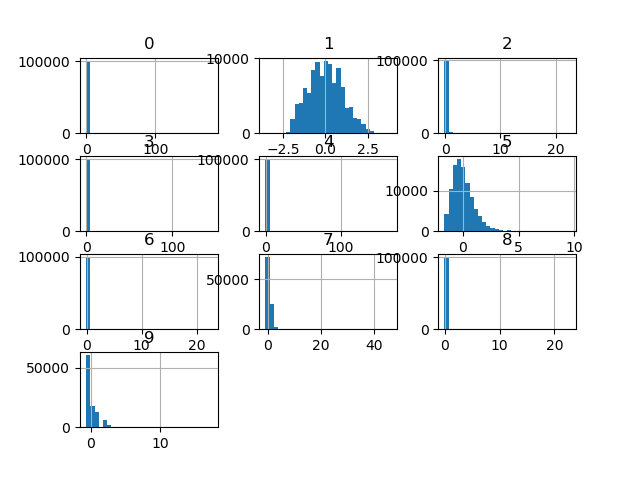

In [321]:
df_temp.hist(bins = 30);

In [38]:
X

array([[-0.01986752, -1.37497766,  0.59343952, ..., -0.0187852 ,
         0.17450943,  1.13639505],
       [-0.02298463,  2.21501051, -0.10036319, ..., -0.8937361 ,
        -0.05873894, -0.66792214],
       [-0.01990211,  0.31841298, -0.10036319, ..., -0.8937361 ,
        -0.05873894, -0.66792214],
       ..., 
       [-0.0226886 ,  0.38614861, -0.10036319, ..., -0.0187852 ,
        -0.05873894,  2.03855365],
       [-0.02290489, -1.10403516, -0.10036319, ..., -0.0187852 ,
        -0.05873894, -0.66792214],
       [-0.02236639,  1.1312405 , -0.10036319, ..., -0.0187852 ,
        -0.05873894, -0.66792214]])

## Prepare test data in same way

In [39]:
df_test = pd.read_csv('./Eval.csv')

df_test

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9
0,-0.235544,0.090909,0,-0.408420,0.759402,0.000000,0,-0.5,0,0
1,-0.273905,0.681818,1,-0.526768,0.132906,-0.666667,0,-0.5,0,0
2,0.258914,0.045455,0,0.035590,-0.097863,0.333333,0,0.0,0,2
3,-0.291358,0.227273,0,-0.520809,0.032906,-0.500000,0,0.0,0,0
4,1.060935,-0.681818,0,-0.210981,-0.232051,-0.833333,0,-0.5,0,4
5,-0.291358,-0.136364,0,-0.479704,-0.317521,-1.000000,0,-0.5,0,0
6,-0.290537,1.136364,0,-0.528734,-0.744872,-0.666667,0,-0.5,0,0
7,-0.075091,-0.772727,0,0.533724,0.430342,-0.500000,0,0.0,0,0
8,1.598362,1.045455,0,3.799147,-0.744872,-0.833333,0,-0.5,0,0
9,-0.140467,0.318182,0,-0.138854,0.670513,0.166667,0,0.0,0,0


In [40]:
df_test.isna().sum()

variable_0    0
variable_1    0
variable_2    0
variable_3    0
variable_4    0
variable_5    0
variable_6    0
variable_7    0
variable_8    0
variable_9    0
dtype: int64

In [41]:
X_test = scale(df_test.values)

## Split into training, validation sets (this is not needed for all methods)

In [42]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

## Build Baseline Neural Network

In [43]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [97]:
num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.1811 - acc: 0.9382 - val_loss: 0.1892 - val_acc: 0.9359
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.1810 - acc: 0.9384 - val_loss: 0.1886 - val_acc: 0.9364
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.1809 - acc: 0.9382 - val_loss: 0.1895 - val_acc: 0.9352
Epoch 4/300
80000/80000 [==============================] - 0s - loss: 0.1809 - acc: 0.9381 - val_loss: 0.1890 - val_acc: 0.9364
Epoch 5/300
80000/80000 [==============================] - 0s - loss: 0.1808 - acc: 0.9382 - val_loss: 0.1888 - val_acc: 0.9365
Epoch 6/300
80000/80000 [==============================] - 0s - loss: 0.1809 - acc: 0.9380 - val_loss: 0.1886 - val_acc: 0.9366
Epoch 7/300
80000/80000 [==============================] - 0s - loss: 0.1806 - acc: 0.9385 - val_loss: 0.1890 - val_acc: 0.9364
Epoch 8/300
80000/80000 [=============================

80000/80000 [==============================] - 0s - loss: 0.1763 - acc: 0.9386 - val_loss: 0.1843 - val_acc: 0.9371
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1764 - acc: 0.9384 - val_loss: 0.1846 - val_acc: 0.9367
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1761 - acc: 0.9386 - val_loss: 0.1855 - val_acc: 0.9364
Epoch 129/300
80000/80000 [==============================] - 0s - loss: 0.1763 - acc: 0.9385 - val_loss: 0.1847 - val_acc: 0.9369
Epoch 130/300
80000/80000 [==============================] - 0s - loss: 0.1762 - acc: 0.9388 - val_loss: 0.1857 - val_acc: 0.9373
Epoch 131/300
80000/80000 [==============================] - 0s - loss: 0.1764 - acc: 0.9385 - val_loss: 0.1844 - val_acc: 0.9369
Epoch 132/300
80000/80000 [==============================] - 0s - loss: 0.1762 - acc: 0.9385 - val_loss: 0.1848 - val_acc: 0.9368
Epoch 133/300
80000/80000 [==============================] - 0s - loss: 0.1762 - acc: 0.9385 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1752 - acc: 0.9386 - val_loss: 0.1891 - val_acc: 0.9352
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1754 - acc: 0.9388 - val_loss: 0.1833 - val_acc: 0.9365
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1753 - acc: 0.9390 - val_loss: 0.1854 - val_acc: 0.9360
Epoch 255/300
80000/80000 [==============================] - 0s - loss: 0.1752 - acc: 0.9390 - val_loss: 0.1878 - val_acc: 0.9347
Epoch 256/300
80000/80000 [==============================] - 0s - loss: 0.1752 - acc: 0.9388 - val_loss: 0.1856 - val_acc: 0.9358
Epoch 257/300
80000/80000 [==============================] - 0s - loss: 0.1754 - acc: 0.9388 - val_loss: 0.1840 - val_acc: 0.9370
Epoch 258/300
80000/80000 [==============================] - 0s - loss: 0.1753 - acc: 0.9390 - val_loss: 0.1858 - val_acc: 0.9367
Epoch 259/300
80000/80000 [==============================] - 0s - loss: 0.1752 - acc: 0.9390 - val_loss:

In [100]:
def plot_loss(history, num):
    '''
    input: history from training keras sequential model (with validation data)
    output:  plot validation and training loss
    return:  tuple (list of training loss, list of validation loss)
    '''
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, num_epochs+1)

    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return(loss_values, val_loss_values)

<IPython.core.display.Javascript object>


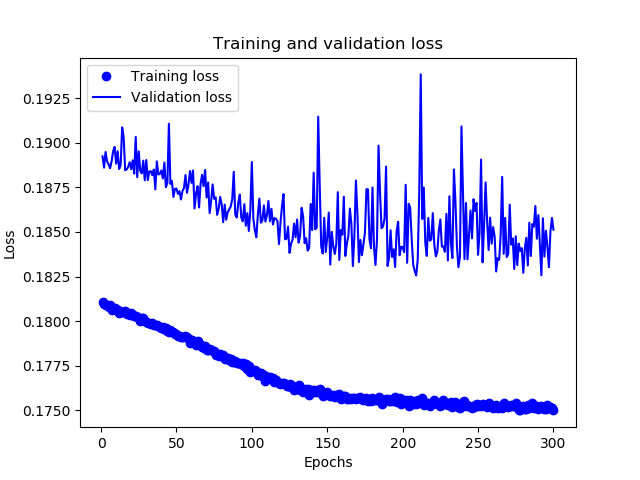

In [101]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [102]:
np.min(val_loss_values)

0.1825619833469391

In [103]:
np.argmin(val_loss_values)

208

In [104]:
def plot_accuracy(history, num):
    '''
    input: history from training keras sequential model (with validation data)
    output:  plot validation and training accuracy
    return:  tuple (list of training accuracy, list of validation accuracy)
    '''
    history_dict = history.history
    epochs = range(1, num_epochs+1)
    plt.figure()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return(acc_values, val_acc_values)

<IPython.core.display.Javascript object>


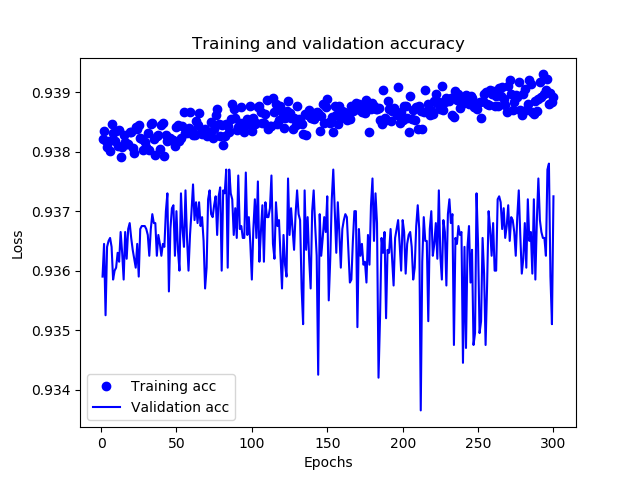

In [105]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [95]:
np.max(val_acc_values)

0.93689999999999996

In [106]:
np.argmax(val_acc_values)

296

## Tune Hyperparameters

## Only two layers

In [154]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10,)))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.4804 - acc: 0.9012 - val_loss: 0.3874 - val_acc: 0.9332
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.3338 - acc: 0.9338 - val_loss: 0.2899 - val_acc: 0.9329
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2659 - acc: 0.9339 - val_loss: 0.2469 - val_acc: 0.9328
Epoch 4/300
80000/80000 [==============================] - 0s - loss: 0.2376 - acc: 0.9338 - val_loss: 0.2

80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9370 - val_loss: 0.1919 - val_acc: 0.9356
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9371 - val_loss: 0.1919 - val_acc: 0.9358
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1862 - acc: 0.9371 - val_loss: 0.1919 - val_acc: 0.9361
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9368 - val_loss: 0.1922 - val_acc: 0.9358
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9369 - val_loss: 0.1919 - val_acc: 0.9358
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9370 - val_loss: 0.1920 - val_acc: 0.9358
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9368 - val_loss: 0.1920 - val_acc: 0.9361
Epoch 129/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9371 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1854 - acc: 0.9370 - val_loss: 0.1918 - val_acc: 0.9358
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1853 - acc: 0.9370 - val_loss: 0.1918 - val_acc: 0.9365
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1853 - acc: 0.9371 - val_loss: 0.1925 - val_acc: 0.9361
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1854 - acc: 0.9367 - val_loss: 0.1918 - val_acc: 0.9362
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1854 - acc: 0.9369 - val_loss: 0.1918 - val_acc: 0.9353
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1853 - acc: 0.9369 - val_loss: 0.1923 - val_acc: 0.9357
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1853 - acc: 0.9369 - val_loss: 0.1919 - val_acc: 0.9358
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1853 - acc: 0.9369 - val_loss:

<IPython.core.display.Javascript object>


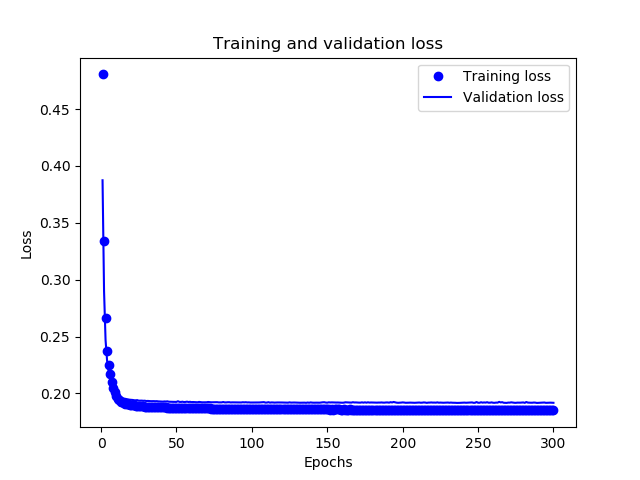

In [155]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [156]:
np.min(val_loss_values)

0.19167156834602356

In [157]:
np.argmin(val_loss_values)

288

<IPython.core.display.Javascript object>


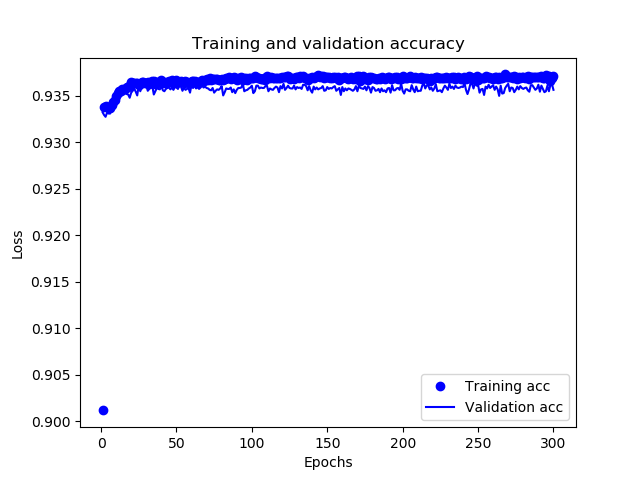

In [158]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [159]:
np.max(val_acc_values)

0.93645000009536739

In [160]:
np.argmax(val_acc_values)

247

## Smaller network performs almost as well as deeper network

### Try adding dimensions to hidden layer

In [147]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10,)))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.6043 - acc: 0.7165 - val_loss: 0.4213 - val_acc: 0.9321
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.3356 - acc: 0.9336 - val_loss: 0.2753 - val_acc: 0.9330
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2540 - acc: 0.9338 - val_loss: 0.2394 - val_acc: 0.9331
Epoch 4/300
80000/80000 [==============================] - 0s - loss: 0.2332 - acc: 0.9337 - val_loss: 0.2

80000/80000 [==============================] - 0s - loss: 0.1852 - acc: 0.9374 - val_loss: 0.1914 - val_acc: 0.9363
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1852 - acc: 0.9372 - val_loss: 0.1918 - val_acc: 0.9357
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1851 - acc: 0.9372 - val_loss: 0.1918 - val_acc: 0.9358
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1851 - acc: 0.9374 - val_loss: 0.1916 - val_acc: 0.9356
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1852 - acc: 0.9373 - val_loss: 0.1916 - val_acc: 0.9358
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1851 - acc: 0.9374 - val_loss: 0.1916 - val_acc: 0.9354
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1851 - acc: 0.9373 - val_loss: 0.1915 - val_acc: 0.9359
Epoch 129/300
80000/80000 [==============================] - 0s - loss: 0.1851 - acc: 0.9370 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9375 - val_loss: 0.1912 - val_acc: 0.9366
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9375 - val_loss: 0.1914 - val_acc: 0.9362
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9375 - val_loss: 0.1911 - val_acc: 0.9361
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9375 - val_loss: 0.1911 - val_acc: 0.9365
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1839 - acc: 0.9374 - val_loss: 0.1916 - val_acc: 0.9363
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9373 - val_loss: 0.1913 - val_acc: 0.9365
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1839 - acc: 0.9376 - val_loss: 0.1911 - val_acc: 0.9360
Epoch 255/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9374 - val_loss:

<IPython.core.display.Javascript object>


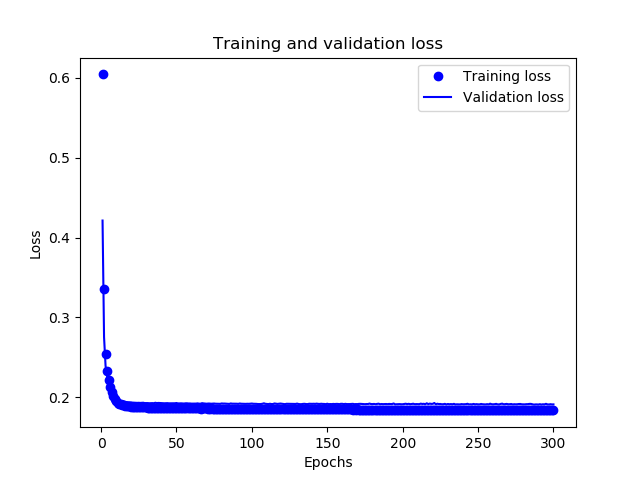

In [148]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [149]:
np.min(val_loss_values)

0.1907979407787323

In [150]:
np.argmin(val_loss_values)

286

<IPython.core.display.Javascript object>


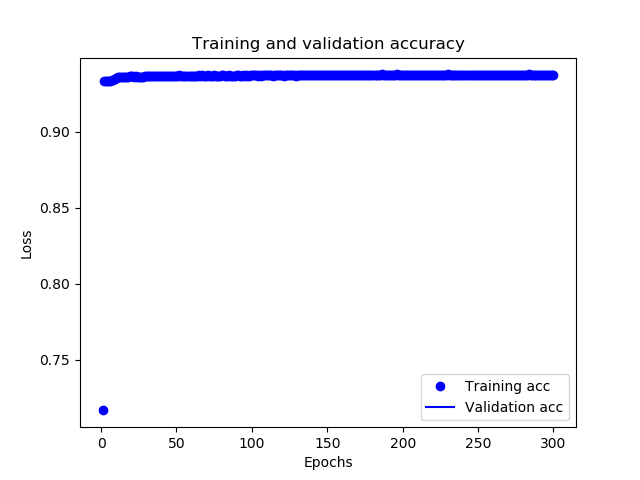

In [151]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [152]:
np.max(val_acc_values)

0.93725000009536741

In [153]:
np.argmax(val_acc_values)

298

## Finally, let's look at the deeper network with "wider" (higher dimension) hidden layers.  This is also called higher "capacity".

In [161]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.3848 - acc: 0.9068 - val_loss: 0.2560 - val_acc: 0.9331
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.2370 - acc: 0.9336 - val_loss: 0.2227 - val_acc: 0.9331
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2122 - acc: 0.9337 - val_l

80000/80000 [==============================] - 0s - loss: 0.1828 - acc: 0.9379 - val_loss: 0.1912 - val_acc: 0.9359
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1827 - acc: 0.9380 - val_loss: 0.1909 - val_acc: 0.9353
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1828 - acc: 0.9376 - val_loss: 0.1914 - val_acc: 0.9352
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9382 - val_loss: 0.1922 - val_acc: 0.9365
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1827 - acc: 0.9378 - val_loss: 0.1918 - val_acc: 0.9356
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1827 - acc: 0.9378 - val_loss: 0.1913 - val_acc: 0.9358
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9379 - val_loss: 0.1916 - val_acc: 0.9359
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1825 - acc: 0.9377 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1809 - acc: 0.9387 - val_loss: 0.1924 - val_acc: 0.9358
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1808 - acc: 0.9388 - val_loss: 0.1924 - val_acc: 0.9357
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1807 - acc: 0.9387 - val_loss: 0.1948 - val_acc: 0.9339
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1808 - acc: 0.9390 - val_loss: 0.1916 - val_acc: 0.9354
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1807 - acc: 0.9390 - val_loss: 0.1914 - val_acc: 0.9361
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1808 - acc: 0.9386 - val_loss: 0.1911 - val_acc: 0.9355
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1807 - acc: 0.9387 - val_loss: 0.1922 - val_acc: 0.9348
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1807 - acc: 0.9387 - val_loss:

<IPython.core.display.Javascript object>


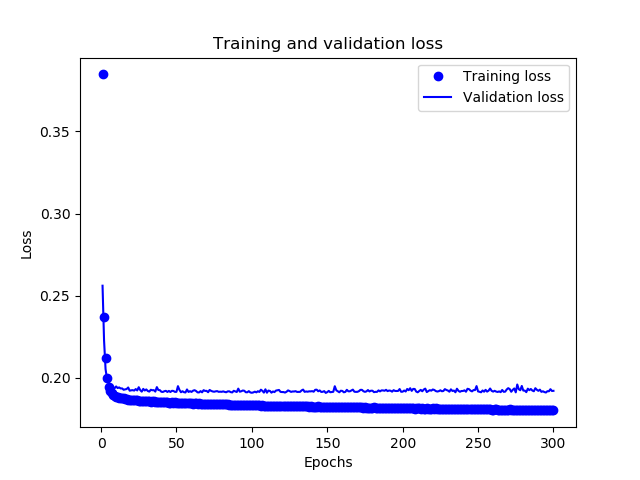

In [162]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [163]:
np.min(val_loss_values)

0.19068776938915252

In [164]:
np.argmin(val_loss_values)

148

<IPython.core.display.Javascript object>


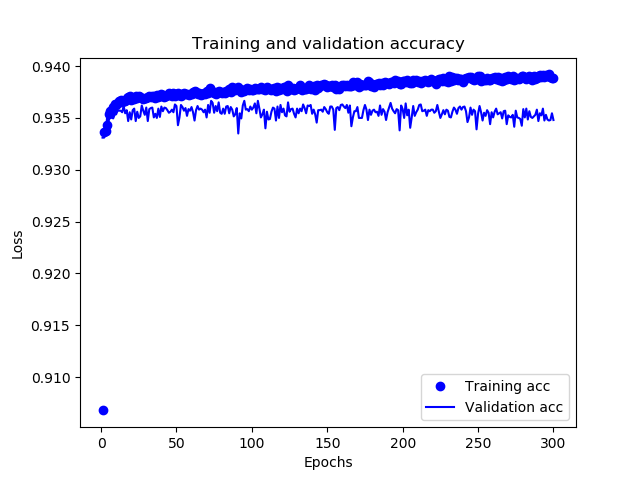

In [165]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [166]:
np.max(val_acc_values)

0.93665000076293947

In [167]:
np.argmax(val_acc_values)

103

## We have achieved a slightly lower validation accuracy, so let's use the previous model

## With more time and computing power, we can grid-search these hyper-parameters either using for loops or sklearn.model_selection.GridSearchCV

## In the beginning, it is useful to carefully do this by hand, to understand and control hyperparameters

## * ~BEST MODEL~ *

In [175]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.4270 - acc: 0.9041 - val_loss: 0.2887 - val_acc: 0.9328
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.2528 - acc: 0.9339 - val_loss: 0.2333 - val_acc: 0.9328
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2247 - acc: 0.9338 - val_loss: 0.2177 - val_acc: 0.9328
Epoch 4/300
80000/80000 [==============================] - 0s - loss: 0.2108 - acc: 0.9340 - val_loss: 0.2

80000/80000 [==============================] - 0s - loss: 0.1843 - acc: 0.9377 - val_loss: 0.1910 - val_acc: 0.9369
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1842 - acc: 0.9376 - val_loss: 0.1911 - val_acc: 0.9376
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1842 - acc: 0.9376 - val_loss: 0.1918 - val_acc: 0.9368
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1844 - acc: 0.9377 - val_loss: 0.1908 - val_acc: 0.9368
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1843 - acc: 0.9376 - val_loss: 0.1916 - val_acc: 0.9365
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1842 - acc: 0.9379 - val_loss: 0.1919 - val_acc: 0.9361
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1842 - acc: 0.9376 - val_loss: 0.1910 - val_acc: 0.9365
Epoch 129/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9377 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9379 - val_loss: 0.1904 - val_acc: 0.9362
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1827 - acc: 0.9378 - val_loss: 0.1902 - val_acc: 0.9367
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9380 - val_loss: 0.1901 - val_acc: 0.9371
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9379 - val_loss: 0.1902 - val_acc: 0.9365
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1825 - acc: 0.9376 - val_loss: 0.1904 - val_acc: 0.9363
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9379 - val_loss: 0.1900 - val_acc: 0.9370
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1826 - acc: 0.9380 - val_loss: 0.1902 - val_acc: 0.9366
Epoch 255/300
80000/80000 [==============================] - 0s - loss: 0.1827 - acc: 0.9376 - val_loss:

<IPython.core.display.Javascript object>


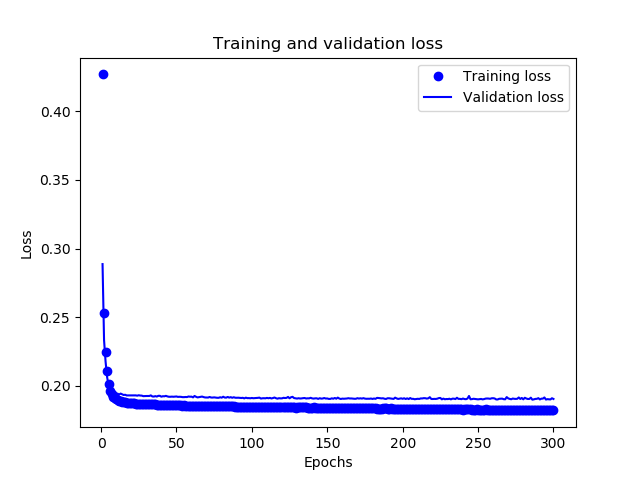

In [176]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [177]:
np.min(val_loss_values)

0.18983906185626984

In [178]:
np.argmin(val_loss_values)

285

<IPython.core.display.Javascript object>


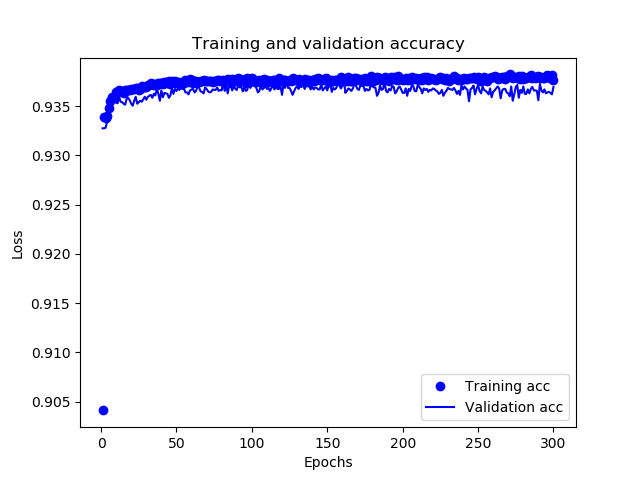

In [179]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [180]:
np.max(val_acc_values)

0.93774999999999997

In [181]:
np.argmax(val_acc_values)

160

In [182]:
val_loss_values[160]

0.19050341660976411

## We are seeing a plateau of validation accuracy at epoch 160, and validation accuracy is also   as low as the best model.

## One last double-check to see if a deeper model with this capacity does better.

In [183]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.2915 - acc: 0.9331 - val_loss: 0.2242 - val_acc: 0.9331
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.2100 - acc: 0.9345 - val_loss: 0.2013 - val_acc: 0.9346
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.1954 - acc: 0.9366 - val_l

80000/80000 [==============================] - 0s - loss: 0.1807 - acc: 0.9387 - val_loss: 0.1922 - val_acc: 0.9364
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1804 - acc: 0.9388 - val_loss: 0.1934 - val_acc: 0.9358
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1805 - acc: 0.9389 - val_loss: 0.1937 - val_acc: 0.9352
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1804 - acc: 0.9389 - val_loss: 0.1915 - val_acc: 0.9358
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1803 - acc: 0.9391 - val_loss: 0.1929 - val_acc: 0.9360
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1805 - acc: 0.9390 - val_loss: 0.1924 - val_acc: 0.9365
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1804 - acc: 0.9389 - val_loss: 0.1940 - val_acc: 0.9365
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1803 - acc: 0.9390 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1762 - acc: 0.9400 - val_loss: 0.1984 - val_acc: 0.9332
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1761 - acc: 0.9400 - val_loss: 0.1922 - val_acc: 0.9349
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1759 - acc: 0.9400 - val_loss: 0.1938 - val_acc: 0.9348
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1759 - acc: 0.9400 - val_loss: 0.1952 - val_acc: 0.9337
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1761 - acc: 0.9402 - val_loss: 0.1931 - val_acc: 0.9348
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1760 - acc: 0.9403 - val_loss: 0.1937 - val_acc: 0.9345
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1758 - acc: 0.9402 - val_loss: 0.1976 - val_acc: 0.9325
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1758 - acc: 0.9399 - val_loss:

<IPython.core.display.Javascript object>


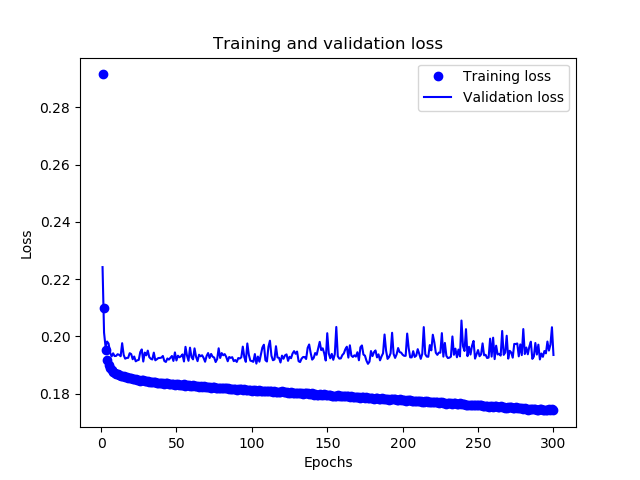

In [184]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [185]:
np.min(val_loss_values)

0.19042928180694579

In [186]:
np.argmin(val_loss_values)

176

<IPython.core.display.Javascript object>


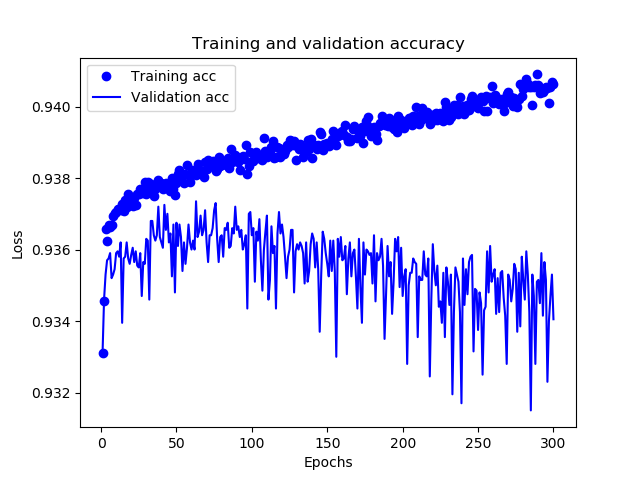

In [187]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [188]:
np.max(val_acc_values)

0.9373500000953674

In [189]:
np.argmax(val_acc_values)

62

In [190]:
val_loss_values[160]

0.19407168040275574

## So the best model has 1 hidden layer and a capacity of 64, and does best at 160 epochs

## However, we notice that the deeper model (more hidden layers) has a better overall accuracy and a larger gap between training accuracy and validation accuracy.  

## That means this model is overfitting, so let's keep this model and see if we can reduce the overfitting using various forms of regularization (below).
  
## Now, let's try some forms of regularization on the shallow and deeper models to see if we can increase the validation accuracy

## Regularization on the "shallow" model (1 hidden layer)

### First, let's try L2 regularization on the shallow model - adding to the loss function of the network a cost proportional to the square of the value of the weight coefficients (the L2 norm of the weights)

In [191]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10,)))

model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.4101 - acc: 0.9219 - val_loss: 0.2956 - val_acc: 0.9331
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.2676 - acc: 0.9337 - val_loss: 0.2499 - val_acc: 0.9331
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2406 - acc: 0.9338 - val_loss: 0.2318 - val_acc: 0.9331
Epoch 4/300
80000/80000 [==============================] - 0s - loss: 0.2247 - acc: 0.9338 - val_loss: 0.2

80000/80000 [==============================] - 0s - loss: 0.1896 - acc: 0.9367 - val_loss: 0.1955 - val_acc: 0.9366
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1896 - acc: 0.9369 - val_loss: 0.1954 - val_acc: 0.9368
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1895 - acc: 0.9371 - val_loss: 0.1952 - val_acc: 0.9364
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1897 - acc: 0.9368 - val_loss: 0.1954 - val_acc: 0.9370
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1895 - acc: 0.9373 - val_loss: 0.1958 - val_acc: 0.9363
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1894 - acc: 0.9370 - val_loss: 0.1959 - val_acc: 0.9365
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1896 - acc: 0.9369 - val_loss: 0.1953 - val_acc: 0.9364
Epoch 129/300
80000/80000 [==============================] - 0s - loss: 0.1894 - acc: 0.9368 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1884 - acc: 0.9370 - val_loss: 0.1943 - val_acc: 0.9364
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1883 - acc: 0.9369 - val_loss: 0.1939 - val_acc: 0.9365
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1884 - acc: 0.9370 - val_loss: 0.1947 - val_acc: 0.9366
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1885 - acc: 0.9371 - val_loss: 0.1935 - val_acc: 0.9365
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1882 - acc: 0.9371 - val_loss: 0.1932 - val_acc: 0.9366
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1882 - acc: 0.9372 - val_loss: 0.1939 - val_acc: 0.9360
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1882 - acc: 0.9373 - val_loss: 0.1940 - val_acc: 0.9360
Epoch 255/300
80000/80000 [==============================] - 0s - loss: 0.1884 - acc: 0.9370 - val_loss:

<IPython.core.display.Javascript object>


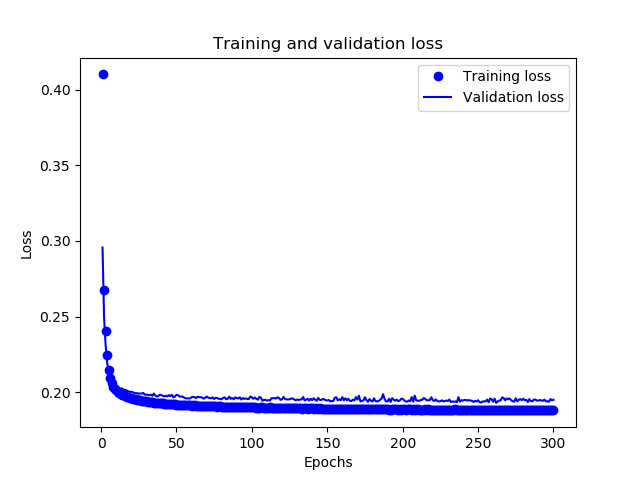

In [192]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [193]:
np.min(val_loss_values)

0.1930005410194397

In [194]:
np.argmin(val_loss_values)

261

<IPython.core.display.Javascript object>


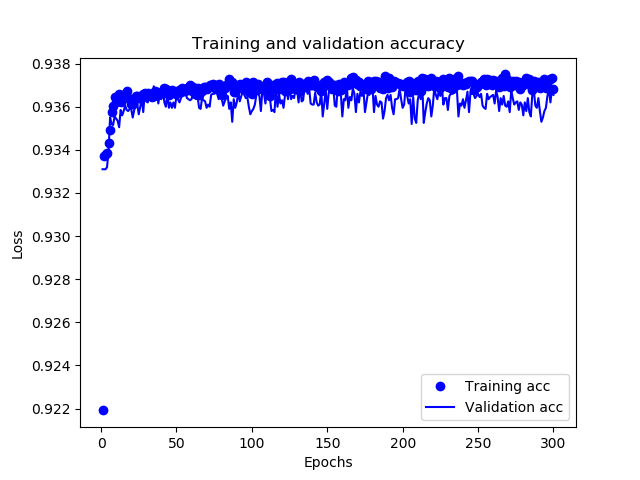

In [195]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [196]:
np.max(val_acc_values)

0.93709999933242794

In [197]:
np.argmax(val_acc_values)

131

### Even with a small cost, our validation scores (loss and accuracy) have gotten worse, so L2 regularization is not useful

### Let's try L1 regularization - adding to the loss function of the network a cost proportional to the square of the value of the weight coefficients (the L2 norm of the weights)

In [198]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10,)))

model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.5189 - acc: 0.9150 - val_loss: 0.3779 - val_acc: 0.9328
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.3293 - acc: 0.9338 - val_loss: 0.2966 - val_acc: 0.9331
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2801 - acc: 0.9338 - val_loss: 0.2658 - val_acc: 0.9331
Epoch 4/300
80000/80000 [==============================] - 0s - loss: 0.2555 - acc: 0.9338 - val_loss: 0.2

80000/80000 [==============================] - 0s - loss: 0.1947 - acc: 0.9368 - val_loss: 0.1997 - val_acc: 0.9357
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1947 - acc: 0.9367 - val_loss: 0.2016 - val_acc: 0.9351
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1947 - acc: 0.9364 - val_loss: 0.1997 - val_acc: 0.9353
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1947 - acc: 0.9366 - val_loss: 0.1998 - val_acc: 0.9360
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1947 - acc: 0.9365 - val_loss: 0.2001 - val_acc: 0.9347
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1946 - acc: 0.9366 - val_loss: 0.2001 - val_acc: 0.9359
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1946 - acc: 0.9368 - val_loss: 0.2007 - val_acc: 0.9355
Epoch 129/300
80000/80000 [==============================] - 0s - loss: 0.1946 - acc: 0.9368 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1932 - acc: 0.9365 - val_loss: 0.1987 - val_acc: 0.9354
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1930 - acc: 0.9364 - val_loss: 0.1978 - val_acc: 0.9357
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1930 - acc: 0.9365 - val_loss: 0.1980 - val_acc: 0.9358
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1931 - acc: 0.9364 - val_loss: 0.1982 - val_acc: 0.9357
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1931 - acc: 0.9363 - val_loss: 0.1988 - val_acc: 0.9355
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1932 - acc: 0.9364 - val_loss: 0.1990 - val_acc: 0.9351
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1933 - acc: 0.9365 - val_loss: 0.1981 - val_acc: 0.9354
Epoch 255/300
80000/80000 [==============================] - 0s - loss: 0.1931 - acc: 0.9364 - val_loss:

<IPython.core.display.Javascript object>


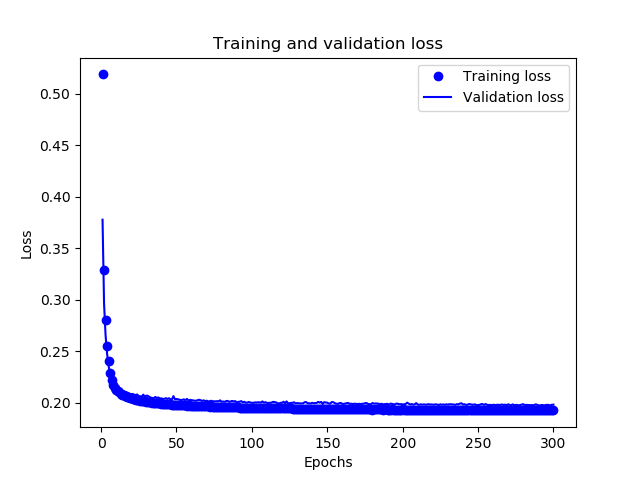

In [199]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [200]:
np.min(val_loss_values)

0.19757916455268859

In [201]:
np.argmin(val_loss_values)

290

<IPython.core.display.Javascript object>


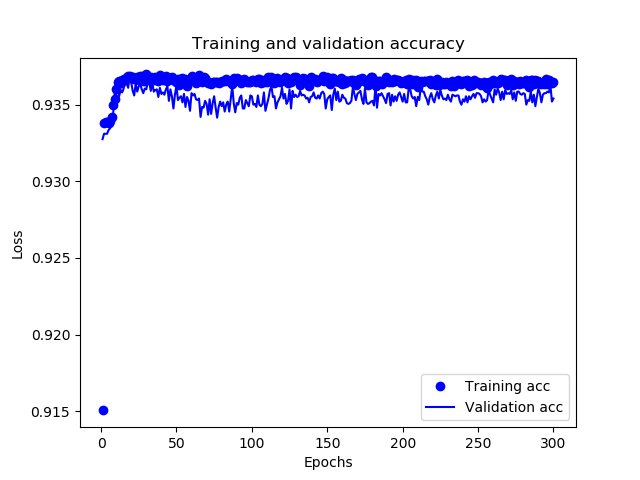

In [202]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [203]:
np.max(val_acc_values)

0.93690000066757206

In [204]:
np.argmax(val_acc_values)

18

### Even with a small cost, our validation scores (loss and accuracy) have gotten worse, so L1 regularization is not useful either

### Let's try dropout (randomly turning off output features during training) 

### First we dropout a small percentage to see if there is any improvement

In [205]:
dropout_rate = 0.1

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(1, activation='sigmoid'))


num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.3863 - acc: 0.9300 - val_loss: 0.2732 - val_acc: 0.9331
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.2454 - acc: 0.9337 - val_loss: 0.2286 - val_acc: 0.9329
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2221 - acc: 0.9338 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1859 - acc: 0.9373 - val_loss: 0.1914 - val_acc: 0.9365
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1864 - acc: 0.9370 - val_loss: 0.1911 - val_acc: 0.9367
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1866 - acc: 0.9367 - val_loss: 0.1907 - val_acc: 0.9366
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1862 - acc: 0.9371 - val_loss: 0.1909 - val_acc: 0.9369
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1861 - acc: 0.9371 - val_loss: 0.1909 - val_acc: 0.9371
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1865 - acc: 0.9371 - val_loss: 0.1911 - val_acc: 0.9366
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1860 - acc: 0.9372 - val_loss: 0.1912 - val_acc: 0.9369
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1865 - acc: 0.9372 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1849 - acc: 0.9373 - val_loss: 0.1899 - val_acc: 0.9367
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1852 - acc: 0.9372 - val_loss: 0.1904 - val_acc: 0.9365
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1850 - acc: 0.9373 - val_loss: 0.1900 - val_acc: 0.9367
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1855 - acc: 0.9369 - val_loss: 0.1900 - val_acc: 0.9369
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1849 - acc: 0.9375 - val_loss: 0.1901 - val_acc: 0.9368
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1851 - acc: 0.9371 - val_loss: 0.1900 - val_acc: 0.9367
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1848 - acc: 0.9374 - val_loss: 0.1906 - val_acc: 0.9368
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1849 - acc: 0.9371 - val_loss:

<IPython.core.display.Javascript object>


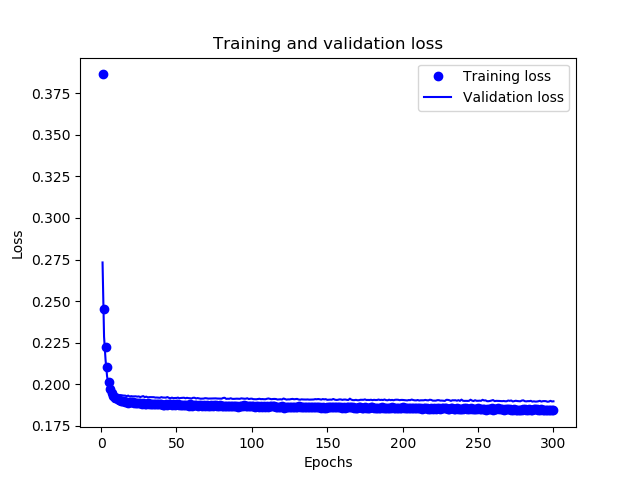

In [206]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [207]:
np.min(val_loss_values)

0.18945955915451049

In [208]:
np.argmin(val_loss_values)

295

<IPython.core.display.Javascript object>


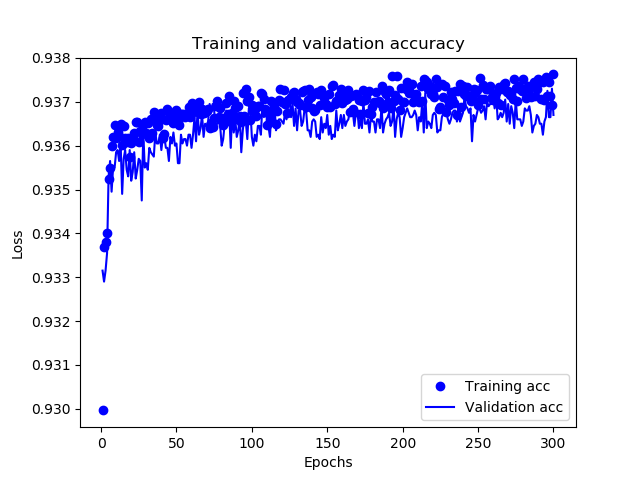

In [209]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [210]:
np.max(val_acc_values)

0.93729999933242802

In [211]:
np.argmax(val_acc_values)

298

## Regularization on the 'deeper' model (1 hidden layer)

### L2 regularization

In [212]:
model = models.Sequential()
model.add(layers.Dense(64,  kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10,)))
model.add(layers.Dense(64,  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.4061 - acc: 0.9104 - val_loss: 0.2987 - val_acc: 0.9330
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.2717 - acc: 0.9339 - val_loss: 0.2504 - val_acc: 0.9333
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.2370 - acc: 0.9343 - val_l

80000/80000 [==============================] - 0s - loss: 0.1908 - acc: 0.9367 - val_loss: 0.1968 - val_acc: 0.9363
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1907 - acc: 0.9369 - val_loss: 0.1961 - val_acc: 0.9359
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1905 - acc: 0.9368 - val_loss: 0.1992 - val_acc: 0.9363
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1906 - acc: 0.9372 - val_loss: 0.1971 - val_acc: 0.9358
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1907 - acc: 0.9368 - val_loss: 0.1972 - val_acc: 0.9352
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1907 - acc: 0.9368 - val_loss: 0.1967 - val_acc: 0.9362
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1906 - acc: 0.9366 - val_loss: 0.1966 - val_acc: 0.9358
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1907 - acc: 0.9368 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1899 - acc: 0.9366 - val_loss: 0.1967 - val_acc: 0.9352
Epoch 247/300
80000/80000 [==============================] - 0s - loss: 0.1900 - acc: 0.9370 - val_loss: 0.1946 - val_acc: 0.9363
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1898 - acc: 0.9368 - val_loss: 0.1960 - val_acc: 0.9354
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1898 - acc: 0.9371 - val_loss: 0.1991 - val_acc: 0.9337
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1897 - acc: 0.9370 - val_loss: 0.1955 - val_acc: 0.9360
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1898 - acc: 0.9371 - val_loss: 0.1952 - val_acc: 0.9358
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1898 - acc: 0.9367 - val_loss: 0.1952 - val_acc: 0.9364
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1899 - acc: 0.9370 - val_loss:

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


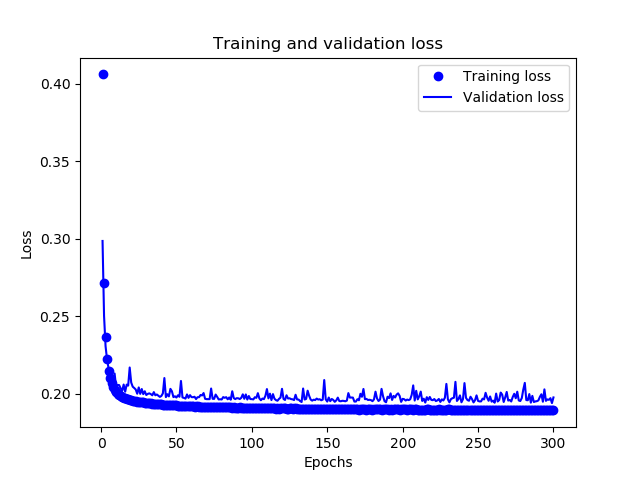

In [218]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [219]:
np.min(val_loss_values)

0.19412237677574157

In [220]:
np.argmin(val_loss_values)

298

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


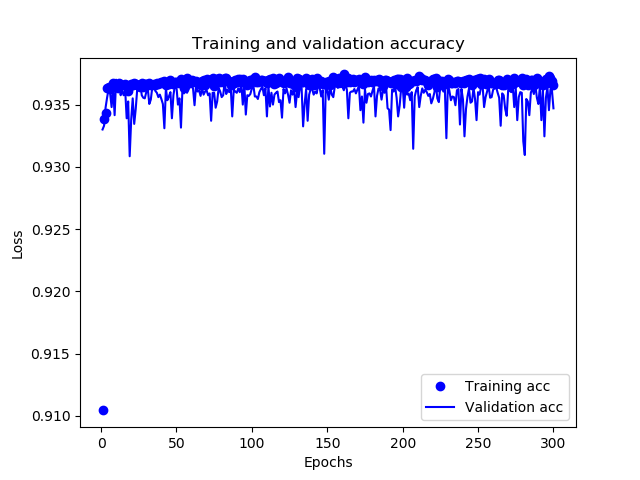

In [221]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [222]:
np.max(val_acc_values)

0.93700000009536744

In [223]:
np.argmax(val_acc_values)

155

### Even a small L2 regularization has decreased our validation accuracy

### Let's try L1 regularization

In [224]:
model = models.Sequential()
model.add(layers.Dense(64,  kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10,)))
model.add(layers.Dense(64,  kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.7361 - acc: 0.9278 - val_loss: 0.5524 - val_acc: 0.9331
Epoch 2/300
80000/80000 [==============================] - 0s - loss: 0.4482 - acc: 0.9338 - val_loss: 0.3613 - val_acc: 0.9331
Epoch 3/300
80000/80000 [==============================] - 0s - loss: 0.3100 - acc: 0.9339 - val_l

80000/80000 [==============================] - 0s - loss: 0.1975 - acc: 0.9366 - val_loss: 0.2022 - val_acc: 0.9357
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1976 - acc: 0.9364 - val_loss: 0.2024 - val_acc: 0.9357
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1976 - acc: 0.9363 - val_loss: 0.2023 - val_acc: 0.9360
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1976 - acc: 0.9362 - val_loss: 0.2019 - val_acc: 0.9364
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1975 - acc: 0.9363 - val_loss: 0.2021 - val_acc: 0.9360
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1975 - acc: 0.9365 - val_loss: 0.2027 - val_acc: 0.9356
Epoch 127/300
80000/80000 [==============================] - 0s - loss: 0.1975 - acc: 0.9363 - val_loss: 0.2026 - val_acc: 0.9357
Epoch 128/300
80000/80000 [==============================] - 0s - loss: 0.1975 - acc: 0.9364 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1965 - acc: 0.9364 - val_loss: 0.2010 - val_acc: 0.9358
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1964 - acc: 0.9364 - val_loss: 0.2015 - val_acc: 0.9358
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1964 - acc: 0.9365 - val_loss: 0.2011 - val_acc: 0.9359
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1964 - acc: 0.9362 - val_loss: 0.2013 - val_acc: 0.9356
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1964 - acc: 0.9365 - val_loss: 0.2008 - val_acc: 0.9362
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1965 - acc: 0.9361 - val_loss: 0.2012 - val_acc: 0.9356
Epoch 253/300
80000/80000 [==============================] - 0s - loss: 0.1964 - acc: 0.9364 - val_loss: 0.2007 - val_acc: 0.9363
Epoch 254/300
80000/80000 [==============================] - 0s - loss: 0.1965 - acc: 0.9364 - val_loss:

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


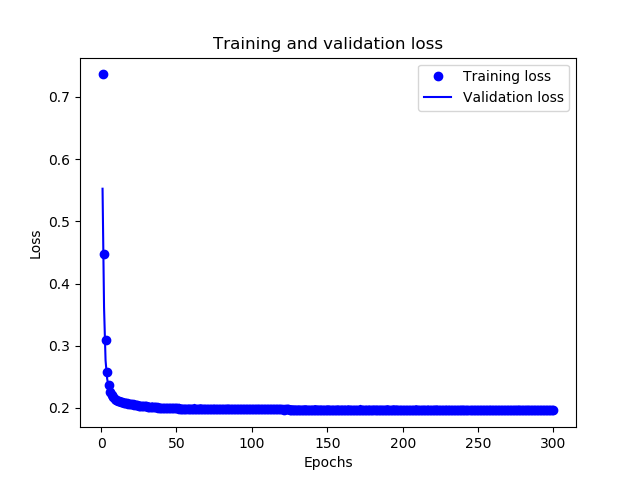

In [225]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [226]:
np.min(val_loss_values)

0.20053317489624023

In [227]:
np.argmin(val_loss_values)

293

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


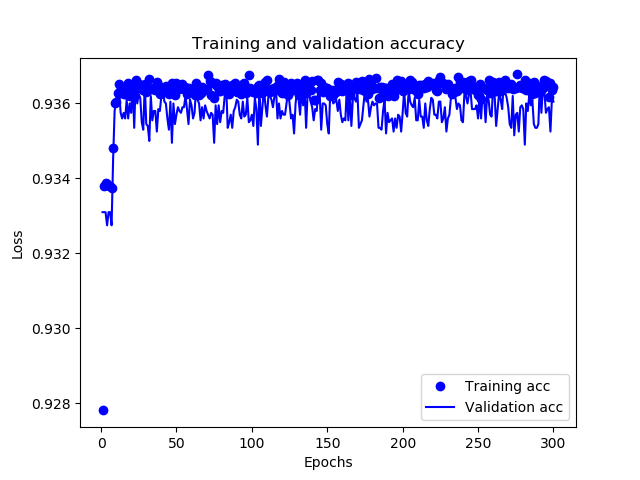

In [228]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [229]:
np.max(val_acc_values)

0.9366499999046326

In [230]:
np.argmax(val_acc_values)

22

### Even a small L1 regularization has decreased our validation accuracy

### Finally, let's try dropout on this deeper model

In [231]:

dropout_rate = 0.1

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(1, activation='sigmoid'))


num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 1s - loss: 0.2867 - acc: 0.9330

80000/80000 [==============================] - 0s - loss: 0.1839 - acc: 0.9380 - val_loss: 0.1904 - val_acc: 0.9364
Epoch 120/300
80000/80000 [==============================] - 0s - loss: 0.1837 - acc: 0.9383 - val_loss: 0.1905 - val_acc: 0.9364
Epoch 121/300
80000/80000 [==============================] - 0s - loss: 0.1839 - acc: 0.9381 - val_loss: 0.1904 - val_acc: 0.9360
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9380 - val_loss: 0.1910 - val_acc: 0.9362
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1837 - acc: 0.9383 - val_loss: 0.1906 - val_acc: 0.9362
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1836 - acc: 0.9380 - val_loss: 0.1902 - val_acc: 0.9365
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1836 - acc: 0.9381 - val_loss: 0.1928 - val_acc: 0.9360
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1840 - acc: 0.9382 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1779 - acc: 0.9390 - val_loss: 0.1880 - val_acc: 0.9351
Epoch 246/300
80000/80000 [==============================] - 0s - loss: 0.1780 - acc: 0.9392 - val_loss: 0.1888 - val_acc: 0.9355
Epoch 247/300
80000/80000 [==============================] - 0s - loss: 0.1781 - acc: 0.9390 - val_loss: 0.1881 - val_acc: 0.9356
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1779 - acc: 0.9392 - val_loss: 0.1876 - val_acc: 0.9351
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1778 - acc: 0.9391 - val_loss: 0.1883 - val_acc: 0.9359
Epoch 250/300
80000/80000 [==============================] - 1s - loss: 0.1785 - acc: 0.9392 - val_loss: 0.1884 - val_acc: 0.9358
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1776 - acc: 0.9396 - val_loss: 0.1873 - val_acc: 0.9350
Epoch 252/300
80000/80000 [==============================] - 0s - loss: 0.1774 - acc: 0.9392 - val_loss:

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


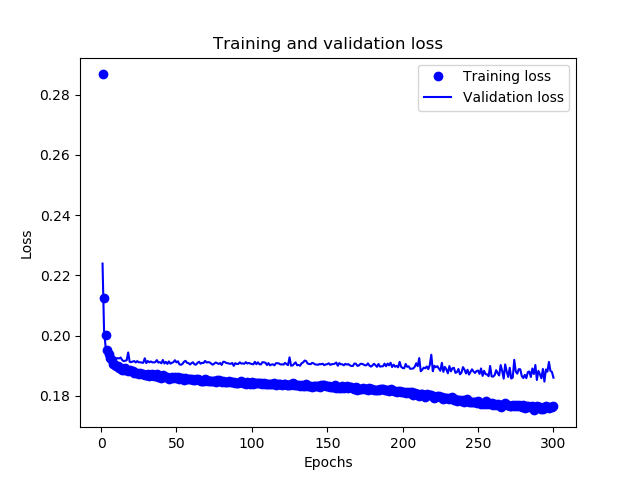

In [232]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [233]:
np.min(val_loss_values)

0.18476238024234773

In [234]:
np.argmin(val_loss_values)

293

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


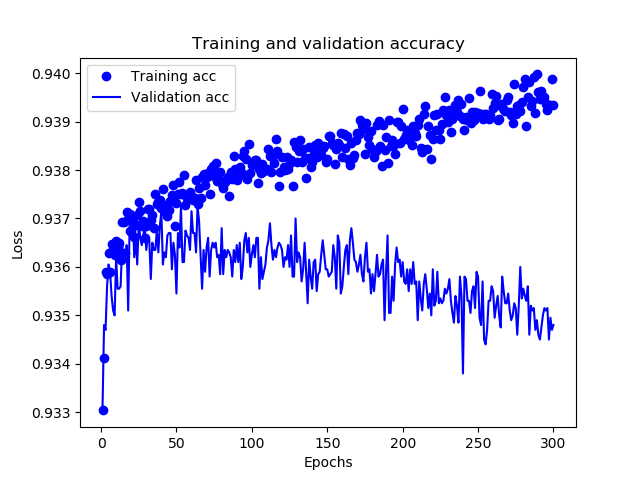

In [235]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [236]:
np.max(val_acc_values)

0.93725000009536741

In [237]:
np.argmax(val_acc_values)

52

### The model does not do better than the deep model above, but not significantly worse either

### Finally, let's try increasing the dropout rate to .5 on this deeper model

In [238]:
dropout_rate = 0.5

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(1, activation='sigmoid'))


num_epochs = 300

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/300
80000/80000 [==============================] - 0s - loss: 0.3118 - acc: 0.9314

80000/80000 [==============================] - 0s - loss: 0.1892 - acc: 0.9356 - val_loss: 0.1911 - val_acc: 0.9354
Epoch 120/300
80000/80000 [==============================] - 0s - loss: 0.1898 - acc: 0.9356 - val_loss: 0.1911 - val_acc: 0.9359
Epoch 121/300
80000/80000 [==============================] - 0s - loss: 0.1895 - acc: 0.9357 - val_loss: 0.1910 - val_acc: 0.9358
Epoch 122/300
80000/80000 [==============================] - 0s - loss: 0.1895 - acc: 0.9358 - val_loss: 0.1912 - val_acc: 0.9357
Epoch 123/300
80000/80000 [==============================] - 0s - loss: 0.1894 - acc: 0.9354 - val_loss: 0.1910 - val_acc: 0.9351
Epoch 124/300
80000/80000 [==============================] - 0s - loss: 0.1894 - acc: 0.9355 - val_loss: 0.1911 - val_acc: 0.9357
Epoch 125/300
80000/80000 [==============================] - 0s - loss: 0.1896 - acc: 0.9352 - val_loss: 0.1911 - val_acc: 0.9359
Epoch 126/300
80000/80000 [==============================] - 0s - loss: 0.1892 - acc: 0.9353 - val_loss:

80000/80000 [==============================] - 0s - loss: 0.1874 - acc: 0.9360 - val_loss: 0.1885 - val_acc: 0.9355
Epoch 245/300
80000/80000 [==============================] - 0s - loss: 0.1878 - acc: 0.9357 - val_loss: 0.1893 - val_acc: 0.9358
Epoch 246/300
80000/80000 [==============================] - 0s - loss: 0.1877 - acc: 0.9355 - val_loss: 0.1888 - val_acc: 0.9357
Epoch 247/300
80000/80000 [==============================] - 0s - loss: 0.1879 - acc: 0.9358 - val_loss: 0.1897 - val_acc: 0.9355
Epoch 248/300
80000/80000 [==============================] - 0s - loss: 0.1872 - acc: 0.9354 - val_loss: 0.1890 - val_acc: 0.9354
Epoch 249/300
80000/80000 [==============================] - 0s - loss: 0.1876 - acc: 0.9353 - val_loss: 0.1896 - val_acc: 0.9354
Epoch 250/300
80000/80000 [==============================] - 0s - loss: 0.1874 - acc: 0.9353 - val_loss: 0.1888 - val_acc: 0.9357
Epoch 251/300
80000/80000 [==============================] - 0s - loss: 0.1870 - acc: 0.9362 - val_loss:

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


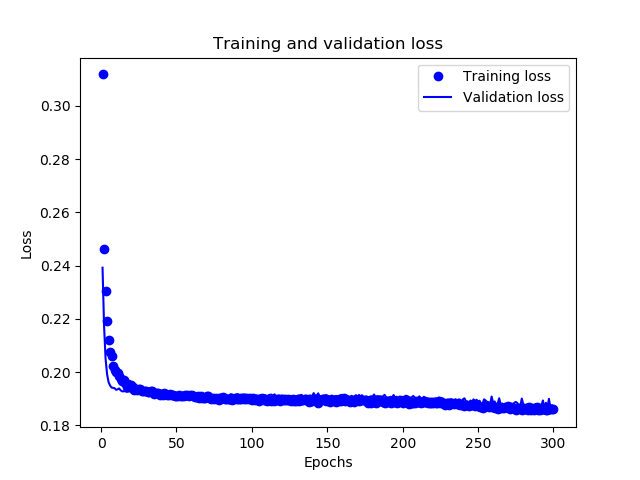

In [239]:
loss_values,val_loss_values = plot_loss(history, num_epochs)

In [240]:
np.min(val_loss_values)

0.18628931789398193

In [241]:
np.argmin(val_loss_values)

293

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


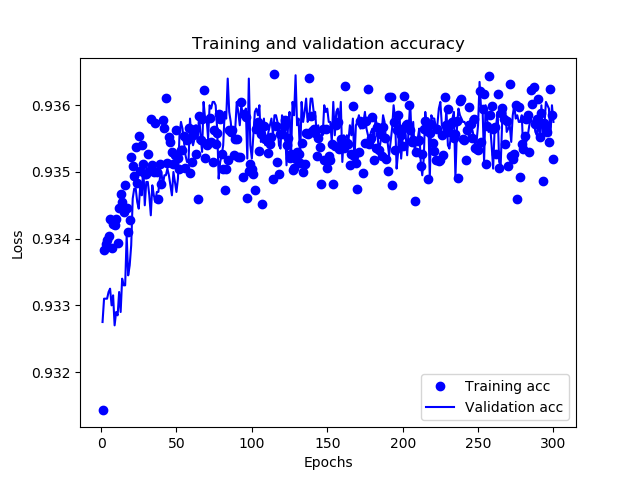

In [242]:
acc_values, val_acc_values = plot_accuracy(history, num_epochs)

In [243]:
np.max(val_acc_values)

0.93644999980926513

In [244]:
np.argmax(val_acc_values)

128

## So, after checking the deeper and shallow models with regularization, the best model has 1 hidden layer and a capacity of 64, and does best at 160 epochs

## FInally, let's train this model on the complete training set, then use it to predict the test output

In [245]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dense(1, activation='sigmoid'))

num_epochs = 160

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X,
                    y,
                    epochs=num_epochs,
                    batch_size=1024)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/160
100000/100000 [==============================] - 0s - loss: 0.3690 - acc: 0.9239     
Epoch 2/160
100000/100000 [==============================] - 0s - loss: 0.2378 - acc: 0.9337     
Epoch 3/160
100000/100000 [==============================] - 0s - loss: 0.2158 - acc: 0.9337     
Epoch 4/160
100000/100000 [==============================] - 0s - loss: 0.2025 - acc: 0.9347     
Epoch 5/160
100000/100000 [==============================] - 0s - loss: 0.1958 - acc: 0.9355     
Epoch 6/160
100000/100000 [=======================

100000/100000 [==============================] - 0s - loss: 0.1847 - acc: 0.9376     
Epoch 159/160
100000/100000 [==============================] - 0s - loss: 0.1847 - acc: 0.9375     
Epoch 160/160
100000/100000 [==============================] - 0s - loss: 0.1847 - acc: 0.9375     


In [303]:
# the output probabilities

y_test = model.predict(X_test)

y_test

array([[ 0.02053768],
       [ 0.06507171],
       [ 0.0179081 ],
       ..., 
       [ 0.03147818],
       [ 0.00588191],
       [ 0.03958736]], dtype=float32)

In [304]:
y_test.astype(int)

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]])

In [305]:
eval_df = pd.DataFrame(y_test, columns = ['yhat'])
eval_df.head()
eval_df['row_id'] = eval_df.index

In [306]:
eval_df.to_csv('./eval_output_Galen_Wilkerson.csv', columns=['row_id' ,'yhat'], index = False)